In [26]:
import torch
import torchvision
from torchvision import transforms, datasets

In [27]:
#entrenar (se pasa a tensor la imagen)
train= datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
#evaluar
test= datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

#divide en batches de 10 imagenes orden aleatorio (utilizar el max posible)
trainset= torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset= torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #(input-imagen, output-elegimos)
        self.fc1=nn.Linear(28*28, 64)
        self.fc2=nn.Linear(64, 64)
        self.fc3=nn.Linear(64, 64)
        self.fc4=nn.Linear(64, 10)
        
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)

        return F.log_softmax(x, dim=1)


    
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [30]:
X = torch.rand((28,28))
X=X.view(-1,28*28)

output=net(X)
output

tensor([[-2.4515, -2.1538, -2.4297, -2.2547, -2.2500, -2.1801, -2.3636, -2.3461,
         -2.2526, -2.3920]], grad_fn=<LogSoftmaxBackward0>)

In [32]:
import torch.optim as optim

 #lr= "learning rate" tamaño de los pasos/saltos 
optimizer = optim.Adam(net.parameters(), lr=0.001)

#"epoca"= ver todas las muestras/ hacer todas las iteraciones (iteracion=1 batch)
EPOCHS=3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch (X tensor, y sol)
        X,y=data
        #low spec
        net.zero_grad()
        output=net(X.view(-1, 28*28))
        loss=F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

hola
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.0559, grad_fn=<NllLossBackward0>)


In [34]:
correct=0
total=0
with torch.no_grad():
    for data in trainset:
        X,y=data
        output=net(X.view(-1, 784))
        for idx, i in enumerate(output):
            #argmax() maquina guess
            #y[idx] solucion correcta
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy: ", round(correct/total,3))
    

Accuracy:  0.987


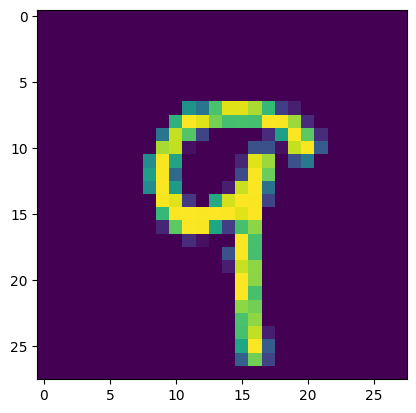

In [47]:
import matplotlib.pyplot as plt
plt.imshow(X[7].view(28,28))
plt.show()

In [48]:
print(torch.argmax(net(X[7].view(-1, 784))[0]))

tensor(9)
